In [25]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package punkt to /Users/Glebazzz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Glebazzz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [26]:
# Import txt file

with open('Key_events.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [27]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914–1918)           1.2 Spanish flu       1.2.1 Russian Revolution and communism           1.3 Between the wars       1.3.1 Economic depression 

In [28]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.2', 'Spanish', 'flu', '1.2.

In [29]:
# Переконаємось, що всі токени - рядки
tokenized_word = [str(word) for word in tokenized_word]

# Приберемо токени, що не є словами
tokenized_word = [word for word in tokenized_word if word.isalpha()]

In [30]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4050 samples and 15236 outcomes>


In [31]:
dist_words.most_common(10)

[('the', 1134),
 ('of', 625),
 ('and', 410),
 ('to', 333),
 ('The', 330),
 ('in', 304),
 ('December', 225),
 ('Retrieved', 209),
 ('a', 191),
 ('was', 137)]

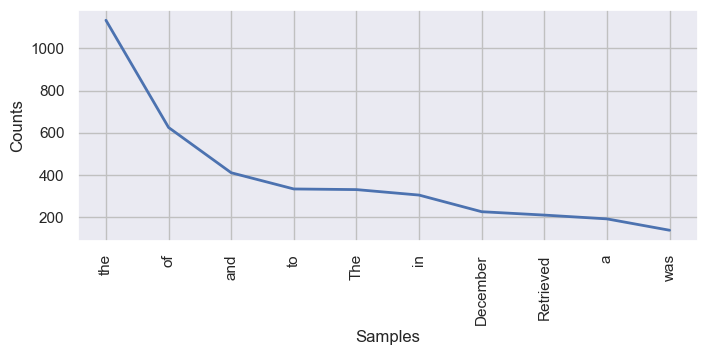

In [32]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10, cumulative=False)
plt.show()

In [33]:
# Removing stopwords in words

filtered_words = []  # створюємо порожній список

for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [34]:
# Create a new FreqDist for filtered–words

Dist_words_filter = FreqDist(filtered_words)
print (Dist_words_filter)



<FreqDist with 3946 samples and 10447 outcomes>


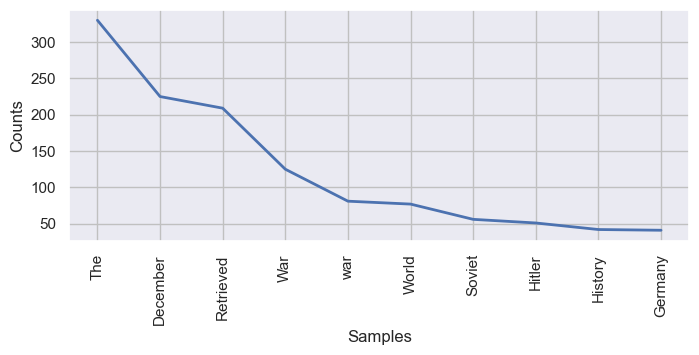

In [35]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
Dist_words_filter.plot(10, cumulative=False)
plt.show()

In [36]:
# Substitute all punctuation marks with a space

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(filtered_words))

In [37]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print (tokenized_word_2)

['Key', 'events', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'century', 'Toggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation

In [38]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2) 

In [39]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [40]:
%%time
text = TextBlob(str(filtered))

CPU times: user 7.84 ms, sys: 321 μs, total: 8.16 ms
Wall time: 8.1 ms


In [41]:
tags_list = text.tags

In [42]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pages", 'NNS'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'accoun

In [49]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top15=df_t.nlargest(15, 'Words')

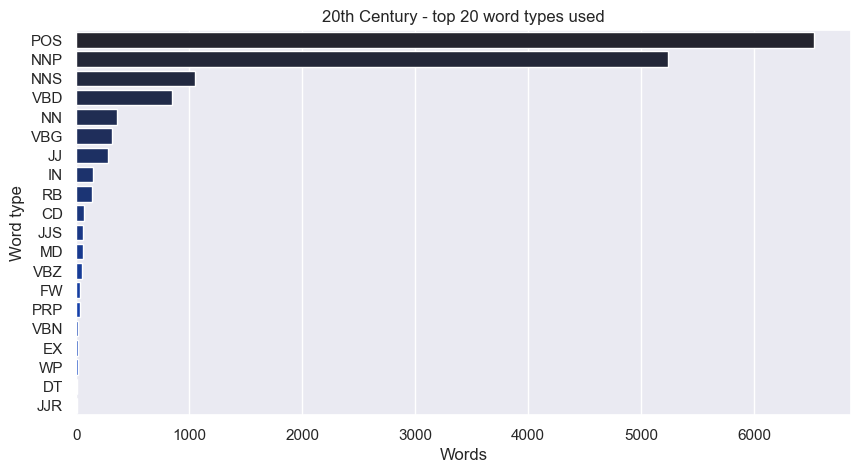

In [50]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top20).set_title("20th Century - top 20 word types used")

**Observations**

- The most frequent POS tags are `POS`, `NNP`, and `NNS`.
- `POS` refers to possessive endings (e.g., `'s`), which appear very often in historical descriptions (“Germany's”, “Britain's”).
- The high count of `NNP` (proper nouns) indicates that the text heavily focuses on specific people, countries, and events, which is expected for a historical narrative.
- `NNS` (plural nouns) and `VBD` (past tense verbs) are also common, reflecting the descriptive and retrospective style of the text.
- The overall pattern shows that this corpus emphasizes naming entities and describing past events, with relatively fewer adjectives (`JJ`) or adverbs (`RB`), suggesting an objective, factual tone.

In [51]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15 = y.nlargest(10, 'Occurrences')

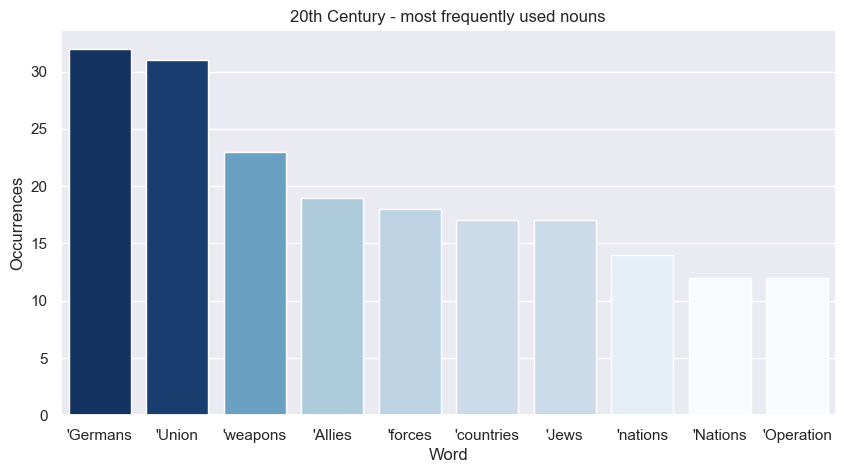

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Створюємо кольори на основі значень
norm = plt.Normalize(top10["Occurrences"].min(), top10["Occurrences"].max())
cmap = plt.cm.Blues  # можна спробувати 'viridis', 'plasma', 'cool', 'Purples', 'Greens'

# Задаємо кольори для кожного стовпчика
colors = [cmap(norm(value)) for value in top10["Occurrences"]]

plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")

bars = sns.barplot(
    x="Word",
    y="Occurrences",
    data=top10,
    palette=colors
)
bars.set_title("20th Century - most frequently used nouns")

plt.show()

In [54]:
listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)

Key events century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log Personal tools Donate Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events century Toggle Historic events century subsection World beginning century war end wars World War I Spanish flu Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External link

In [63]:
# 1. Read the list of countries
countries_df = pd.read_csv("countries_list.csv")

# Remove any spaces around column names
countries_df.columns = countries_df.columns.str.strip()

In [64]:
countries_df = pd.read_csv("countries_list.csv")
print(countries_df.columns)

Index(['ID', 'Country'], dtype='object')


In [65]:
# 2. Make sure the column is named 'country'
#    If not, replace with the correct column name
countries_list = countries_df['Country'].tolist()

In [66]:
# 3. Convert country names to lowercase for matching
countries_list_lower = [c.lower() for c in countries_list]

# 4. Convert your tokens to lowercase
words_lower = [w.lower() for w in tokenized_word]

# 5. Count occurrences of each word
counts = Counter(words_lower)

# 6. Create a list of (country, count)
result = []
for country in countries_list_lower:
    count = counts.get(country, 0)
    result.append((country.title(), count))  # .title() to capitalize

# 7. Create a DataFrame
country_counts_df = pd.DataFrame(result, columns=['Country', 'Mentions'])

# 8. Keep only countries that were mentioned at least once
country_counts_df = country_counts_df[country_counts_df['Mentions'] > 0]

# 9. Sort by frequency
country_counts_df = country_counts_df.sort_values(by='Mentions', ascending=False).reset_index(drop=True)

# 10. Display the result
country_counts_df

,Country,Mentions
0,Germany,41
1,Japan,33
2,France,17
3,Italy,14
4,Vietnam,13
5,Poland,13
6,China,9
7,India,9
8,Russia,9
9,Libya,5


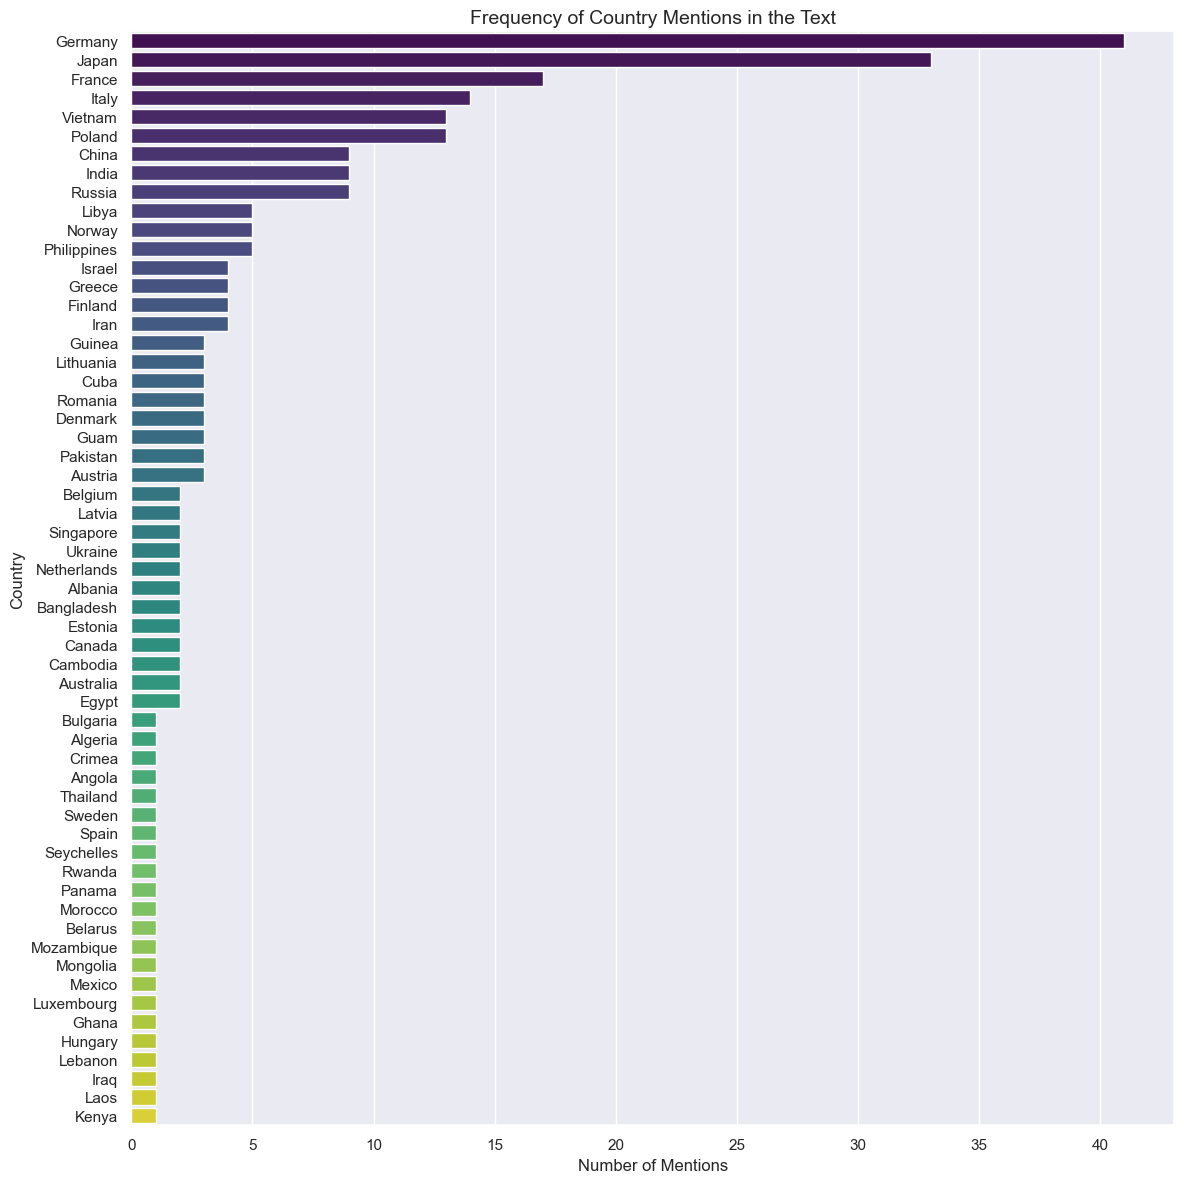

In [68]:
# Make sure Seaborn has a nice style
sns.set_style("darkgrid")

# Sort DataFrame if you haven't yet
country_counts_df = country_counts_df.sort_values(by="Mentions", ascending=False)

# Create figure
plt.figure(figsize=(12, 12))

# Barplot
sns.barplot(
    x="Mentions",
    y="Country",
    data=country_counts_df,
    palette="viridis"
)

plt.title("Frequency of Country Mentions in the Text", fontsize=14)
plt.xlabel("Number of Mentions")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

**Observations**

- Germany is by far the most frequently mentioned country in the text, followed closely by Japan and France. This is consistent with the historical focus on World War II and related events.
- Other European countries such as Italy, Poland, and Russia also have high counts, reflecting their central roles in twentieth-century conflicts.
- The long tail shows many countries that were mentioned only a few times, suggesting that while the text touches on global events, its primary emphasis is on major powers and key theaters of war.
- Interestingly, countries from Africa and Latin America have very low frequencies, highlighting a Eurocentric and Asia-Pacific-centric narrative focus.

In [75]:
with open("Key_events.txt", encoding="utf-8") as f:
    full_text = f.read()
blob = TextBlob(full_text)
sentences = blob.sentences

# For each sentence, calculate sentiment
sentiment_data = []
for sent in sentences:
    sentiment_data.append({
        "sentence": str(sent),
        "polarity": sent.sentiment.polarity,
        "subjectivity": sent.sentiment.subjectivity
    })

# Create DataFrame
sentiment_df = pd.DataFrame(sentiment_data)

# Show a sample
sentiment_df.head()

,sentence,polarity,subjectivity
0,\n\n\n\nKey events of the 20th century - Wikip...,0.047500,0.372500
1,The World Wars sparked tension between countri...,-0.350000,0.700000
2,These advancements have played a significant r...,0.187500,0.437500
3,Historic events in the 20th century[edit]\nWor...,0.111147,0.323268
4,The 1900s saw the decade herald a series of in...,0.000000,0.000000


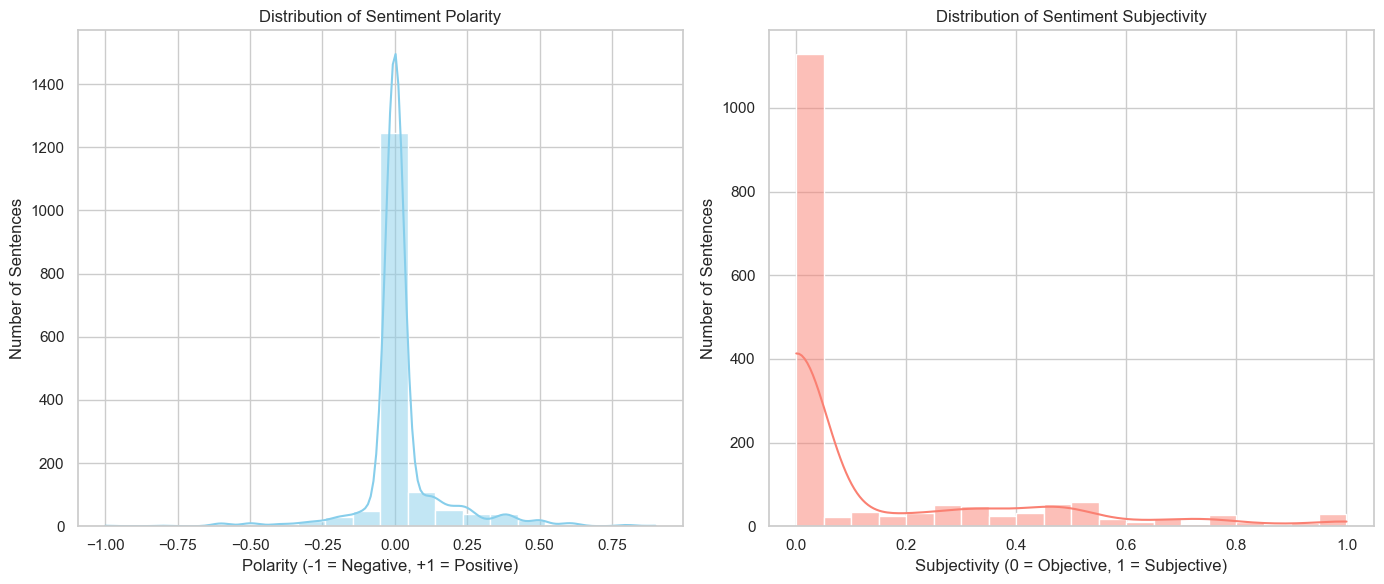

In [76]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))

# Histogram of polarity
plt.subplot(1, 2, 1)
sns.histplot(
    sentiment_df["polarity"],
    bins=20,
    kde=True,
    color="skyblue"
)
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Polarity (-1 = Negative, +1 = Positive)")
plt.ylabel("Number of Sentences")

# Histogram of subjectivity
plt.subplot(1, 2, 2)
sns.histplot(
    sentiment_df["subjectivity"],
    bins=20,
    kde=True,
    color="salmon"
)
plt.title("Distribution of Sentiment Subjectivity")
plt.xlabel("Subjectivity (0 = Objective, 1 = Subjective)")
plt.ylabel("Number of Sentences")

plt.tight_layout()
plt.show()

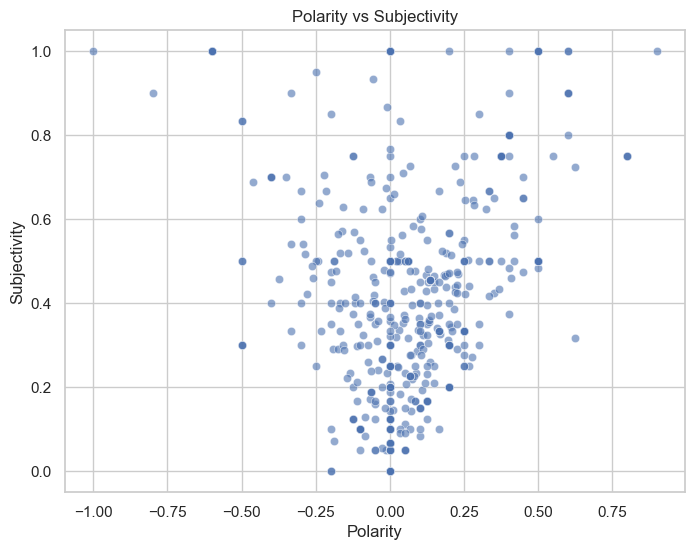

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="polarity",
    y="subjectivity",
    data=sentiment_df,
    alpha=0.6
)
plt.title("Polarity vs Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid(True)
plt.show()

In [78]:
mean_polarity = sentiment_df["polarity"].mean()
mean_subjectivity = sentiment_df["subjectivity"].mean()

print("Average polarity:", round(mean_polarity, 3))
print("Average subjectivity:", round(mean_subjectivity, 3))

Average polarity: 0.022
Average subjectivity: 0.135
